In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing(order='grlex')

Oscilador Harmônico Simples

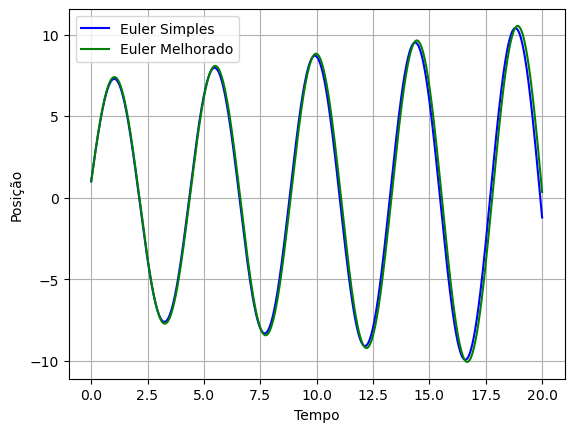

In [34]:
k1 = 10.0
m1 = 5.0

# Definindo f
def f(x, y, z):
    return z

def g(x, y, z): # (independente, dependente, derivada)
    k = k1 # Constante elástica da mola 
    m = m1 # massa
    func2 = -(k/m)*y
    return func2


# Malha de Pontos e condições iniciais
x = np.linspace(0.0, 20.0, 1000) # Para ser uma boa aproximação é necessário muitos pontos (mais de 1000)

y0 = 1.0 # Posição inicial
z0 = 10.0 # Velocidade inicial

h = (x[-1]-x[0])/len(x) # Passo (precisão)


y = [y0]
z = [z0]
# Método de Euler Simples
for k in range(0, len(x)-1):
    z.append(z[k] + h*(g(x[k], y[k], z[k])))
    y.append(y[k] + h*f(x[k], y[k], z[k]))


ym = [y0]
zm = [z0]
# Método de Euler Melhorado
for k in range(0, len(x)-1):
    kl = f(x[k], ym[k], zm[k])
    k2 = f(x[k]+h, ym[k]+(h*kl), zm[k]+(h*kl))
    l1 = g(x[k], ym[k], zm[k])
    l2 = g(x[k]+h, ym[k]+(h*l1), zm[k]+(h*l1))
    zm.append(zm[k] + (h/2)*(l1 + l2))
    ym.append(ym[k] + (h/2)*(kl + k2))
    


# gráfico
plt.plot(x, y, color='blue', label='Euler Simples')
plt.plot(x, ym, color='green', label='Euler Melhorado')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.legend()
plt.grid()
plt.show()



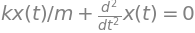

In [35]:
### Solução analítica:

# Símbolos
w0, k, m, t, gama = sp.symbols("omega0, k, m, t, Y")

#Funções
xf = sp.Function('x')

# Equações
eqx = sp.Eq(xf(t).diff(t,2) + (k/m)*xf(t), 0)
eqw0 = sp.Eq(w0**2, k/m)
eqx

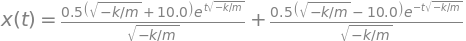

In [36]:
# Solução
sol1 = sp.dsolve(eqx, ics={xf(0): y0, xf(t).diff(t,1).subs(t,0): z0})
sol1

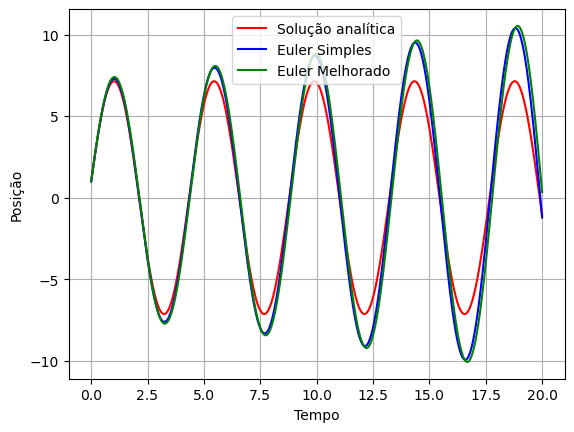

In [37]:
### Plot
tl = np.linspace(0, 20, 1000)


y_t = sp.lambdify(t, sol1.rhs.subs({k:k1, m:m1}), "numpy")
Yp1 = y_t(tl).real


# gráfico

plt.plot(tl, Yp1, color='red', label='Solução analítica')
plt.plot(x, y, color='blue', label='Euler Simples')
plt.plot(x, ym, color='green', label='Euler Melhorado')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.legend()
plt.grid()
plt.show()

Movimento Harmônico Amortecido

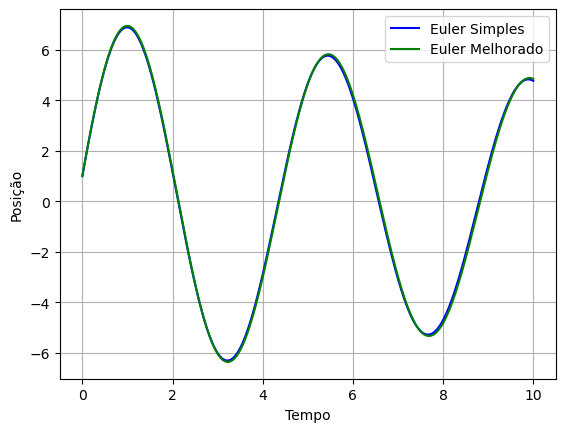

In [38]:
k1 = 10.0
m1 = 5.0

# Definindo f
def f(x, y, z):
    return z

def g(x, y, z): # (independente, dependente, derivada)
    k = k1 # Constante elástica da mola 
    m = m1 # massa
    b = 0.5 # constante
    func2 = -(k/m)*y - (b/m)*z
    return func2


# Malha de Pontos e condições iniciais
x = np.linspace(0.0, 10.0, 1000)

y0 = 1.0 # Posição inicial
z0 = 10.0 # Velocidade inicial

h = (x[-1]-x[0])/len(x) # Passo (precisão)


y = [y0]
z = [z0]
# Método de Euler Simples
for k in range(0, len(x)-1):
    z.append(z[k] + h*(g(x[k], y[k], z[k])))
    y.append(y[k] + h*f(x[k], y[k], z[k]))


ym = [y0]
zm = [z0]
# Método de Euler Melhorado
for k in range(0, len(x)-1):
    kl = f(x[k], ym[k], zm[k])
    k2 = f(x[k]+h, ym[k]+(h*kl), zm[k]+(h*kl))
    l1 = g(x[k], ym[k], zm[k])
    l2 = g(x[k]+h, ym[k]+(h*l1), zm[k]+(h*l1))
    zm.append(zm[k] + (h/2)*(l1 + l2))
    ym.append(ym[k] + (h/2)*(kl + k2))
    


# gráfico
plt.plot(x, y, color='blue', label='Euler Simples')
plt.plot(x, ym, color='green', label='Euler Melhorado')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.legend()
plt.grid()
plt.show()

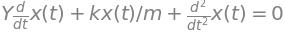

In [39]:
### Solução analítica:

# Símbolos
w0, k, m, t, gama = sp.symbols("omega0, k, m, t, Y")

#Funções
xf = sp.Function('x')

#Equação
eqx2 = sp.Eq(xf(t).diff(t,2) + gama*xf(t).diff(t,1) + (k/m)*xf(t), 0)
eqx2

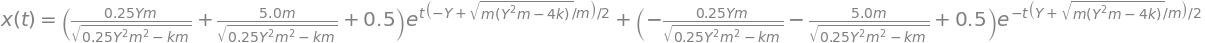

In [40]:
# Solução
sol2 = sp.dsolve(eqx2, ics={xf(0): y0, xf(t).diff(t,1).subs(t,0): z0})
sol2

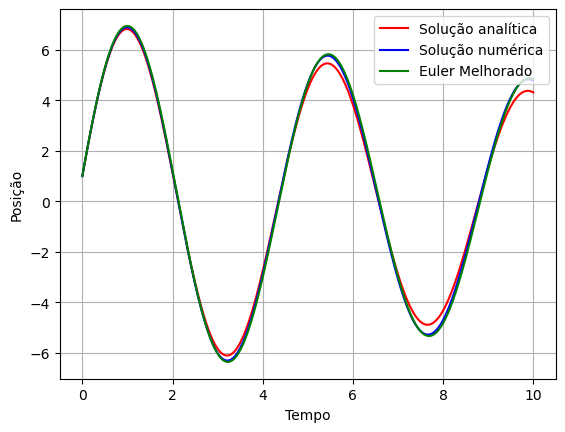

In [41]:
tl = np.linspace(0, 10, 1000)

y_t2 = sp.lambdify(t, sol2.rhs.subs({k:k1, m:m1, gama:0.5/m1}))
Yp2 = y_t2(tl).real


plt.plot(tl, Yp2, color='red', label='Solução analítica')
plt.plot(x, y, color='blue', label='Solução numérica')
plt.plot(x, ym, color='green', label='Euler Melhorado')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.legend()
plt.grid()
plt.show()

Problema do Lançamento Oblíquo (Com resistência)

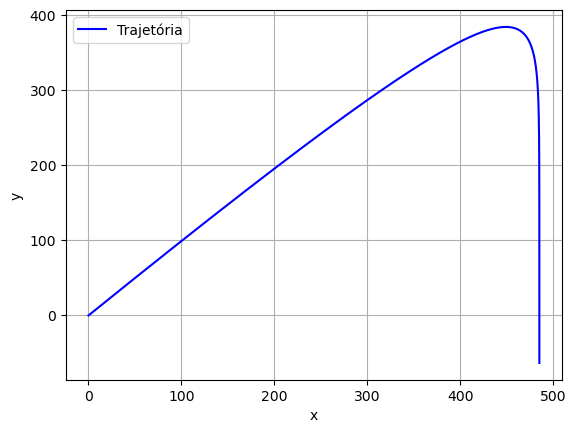

In [42]:
# Definindo as funções do Eixo y
def fy(t, y, vy):
    return vy

def gy(t, y, vy): # (independente, dependente, derivada)
    g = 9.8 # Aceleração da Gravidade
    b = 0.5 # arrasto
    func2 = -g -b*vy
    return func2

# Definindo as funções do Eixo x
def fx(t, x, vx):
    return vx

def gx(t, x, vx): # (independente, dependente, derivada)
    b = 0.5 # arrasto
    func2 = -b*vx
    return func2


# Malha de Pontos e condições iniciais

y0 = 0.0 # Posição inicial y
x0 = 0.0 # Posição inicial x

v0 = 343.0 # Velocidade inicial do projétil
ang = np.radians(45) # Ângulo de lançamento

vy0 = v0*np.sin(ang) # Velocidade inicial y
vx0 = v0*np.cos(ang) # Velocidade inicial x


t = np.linspace(0.0, 30.0, 1000) # Tempo
h = (t[-1]-t[0])/len(t) # Passo de tempo (precisão)


y = [y0]
x = [x0]
vy = [vy0]
vx = [vx0]
# Método de Euler Simples
for k in range(0, len(t)-1):

    vy.append(vy[k] + h*(gy(t[k], y[k], vy[k])))
    y.append(y[k] + h*fy(t[k], y[k], vy[k]))

    vx.append(vx[k] + h*(gx(t[k], x[k], vx[k])))
    x.append(x[k] + h*fx(t[k], x[k], vx[k]))


# gráfico
plt.plot(x, y, color='blue', label='Trajetória')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [43]:
### Solução Analítica

g, t, k, v0, theta = sp.symbols("g,t,k,v0,theta")

#Funções
xf = sp.Function("x")
yf = sp.Function("y")

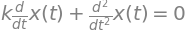

In [44]:
#equação x
eqxr = sp.Eq(xf(t).diff(t, 2) + k*xf(t).diff(t,1), 0)
eqxr

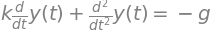

In [45]:
#equação y
eqyr = sp.Eq(yf(t).diff(t, 2) + k*yf(t).diff(t,1), - g)
eqyr

In [46]:
#solução x
solxr = sp.dsolve(eqxr, ics={xf(0):0, xf(t).diff(t, 1).subs(t,0): v0*sp.cos(theta)})
solxr

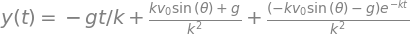

In [47]:
#solução em y
solyr = sp.dsolve(eqyr, ics={yf(0):0, yf(t).diff(t,1).subs(t,0): v0*sp.sin(theta)})
solyr

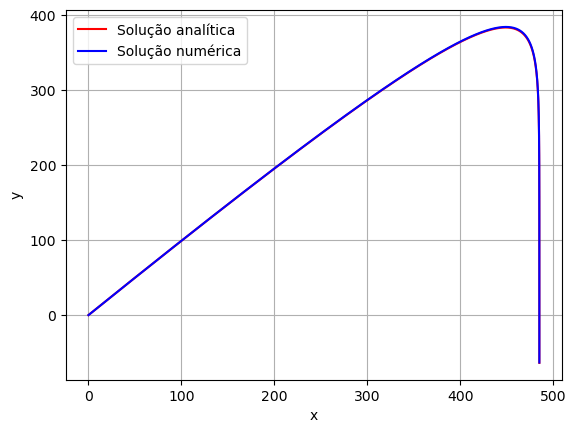

In [48]:
# Plot

tl = np.linspace(0.0, 30.0, 1000)

y_tk1 = sp.lambdify(t, solyr.rhs.subs({g:9.8, k:0.5, v0:343.0, theta:ang}), "numpy")
Yp1 = y_tk1(tl)

x_tk1 = x_tk3 = sp.lambdify(t, solxr.rhs.subs({v0:343.0, k:0.5, theta:ang}), "numpy")
Xp1 = x_tk1(tl)

plt.plot(Xp1, Yp1, color='red', label='Solução analítica')
plt.plot(x, y, color='blue', label='Solução numérica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()